# Problem : Lenovo Laptop Price Prediction
# Algorithm : Multiple Variable Linear Regression
In this notebook, I will trian a model to predict the price of a laptop from lenovo brand based on its features using Linear Regression with Gradien Descent algorithm.

# Tools

In [14]:
import copy, math, time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays
print("done.")

done.


# Features
The training dataset contains three examples with seven features

The Features will be store in x_train and the prices in y

In [15]:
# my data
data = pd.read_csv('lenovo_data.csv')
data

,\tscreen size (inches),\tscreen res y (pixels),\tscreen res x (pixels),\tprocossor (GHz),\tram (GB),\tstorage (GB),\t price $
0,15.6,1366,768,3.2,20,1024,458.98
1,14.0,1920,1080,2.1,4,64,205.00
2,15.6,1920,1080,1.8,24,1024,899.99
3,14.0,1920,1200,4.7,16,512,1469.00
4,14.0,2240,1400,2.4,16,512,1109.99
5,14.0,1366,768,2.6,8,128,199.99
6,16.0,1920,1080,5.0,32,2048,1899.00


In [16]:
arr = data.to_numpy()
# make one column for resolution
resolution = arr[:, 1] * arr[:, 2]
X_features = ['Screen Resolution', 'Processor Speed', 'RAM', 'Storage']
X_train = np.column_stack((resolution, arr[:, 3:6]))
y_train = arr[:, 6]

In [17]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (7, 4), X Type:<class 'numpy.ndarray'>)
y Shape: (7,), y Type:<class 'numpy.ndarray'>)


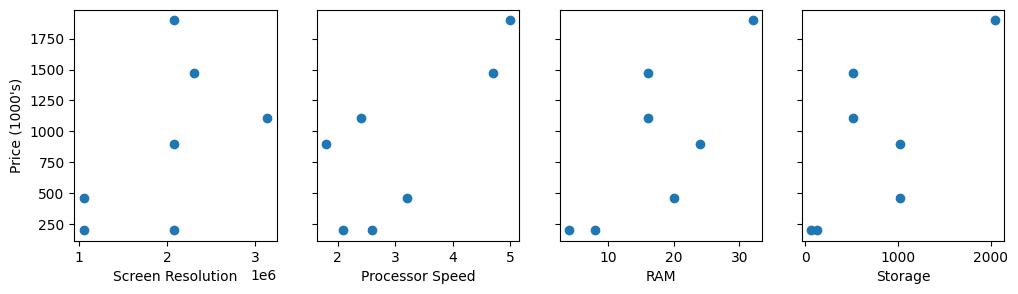

In [18]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# Feature Scaling

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

Each feature x will be normalize using this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{1}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{2}
\end{align}
$$

In [19]:
def zscore_normaliztion(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return mu, sigma, X_norm

### Compare between normalized and unnomalized data

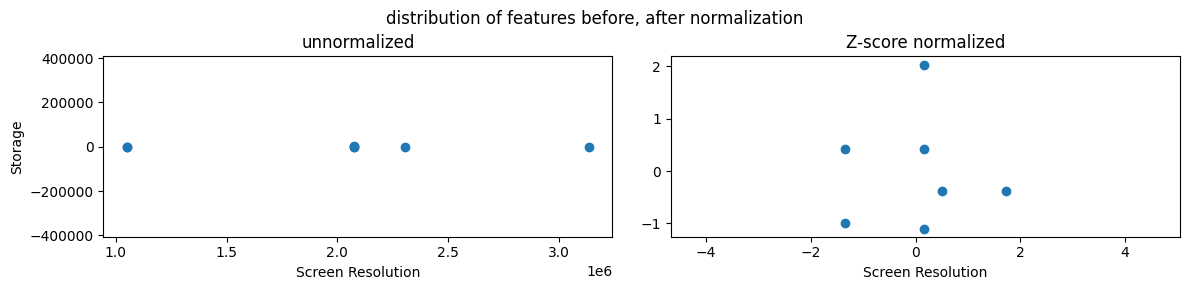

In [20]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_norm[:,0], X_norm[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"Z-score normalized")
ax[1].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, after normalization")
plt.show()

# Predict single element
We'll use this equation:
$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $

where $\cdot$ is a vector `dot product`

In [21]:
def predict_single_element(x, w, b):
    f_wb = np.dot(x, w) + b
    return f_wb

# Example

In [22]:
m,n = X_train.shape           #(number of examples, number of features)
w_init = np.zeros(n)
b_init = 0.0
print("w_init ", w_init)
print("b_init ", b_init)

# get a row from our training data
x_vec = X_train[0,:]

print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_element(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

w_init  [0. 0. 0. 0.]
b_init  0.0
x_vec shape (4,), x_vec value: [1.05e+06 3.20e+00 2.00e+01 1.02e+03]
f_wb shape (), prediction: 0.0


# Compute Cost
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$

where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$ 


In [23]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])** 2
    cost = cost / (2 * m)
    return cost

In [32]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 578493.2457642857


# Gradient Descent Algorithm
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously


In [25]:
def gradient_descent_algorithm(w_init, b_init, X, y, alpha, epsilon, compute_cost, compute_gradient):
    """
     Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      J_history (ndarray (i,)) : Cost ber every iteration
    """
    n = X.shape[0]
    dj_dw = np.ones(n)
    dj_db = 1.0
    J_history = []
    w = copy.deepcopy(w_init)  #avoid modifying global w within function
    b = b_init

    i = 0
    while any(abs(dj_dw) > epsilon):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(compute_cost(X, y, w, b))
        if i%1000 == 0:
            print(f"iteration {i}, cost {J_history[-1]:8.2f}")
        i += 1

    print(f"End of the loop with {i} iterations and Cost of {J_history[-1]:8.2f}")
    
    return w, b, J_history

# Compute Gradient

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{1}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{2}
\end{align}
$$

In [26]:
def compute_gradient(X, y, w, b):
    """
    Returns:
        dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
        dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros(n) 
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        dj_dw = dj_dw + err * X[i]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [27]:
#Compute and display gradient
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -891.7071428571428
dj_dw at initial w,b: 
 [-1.97e+09 -3.30e+03 -1.93e+04 -9.49e+05]


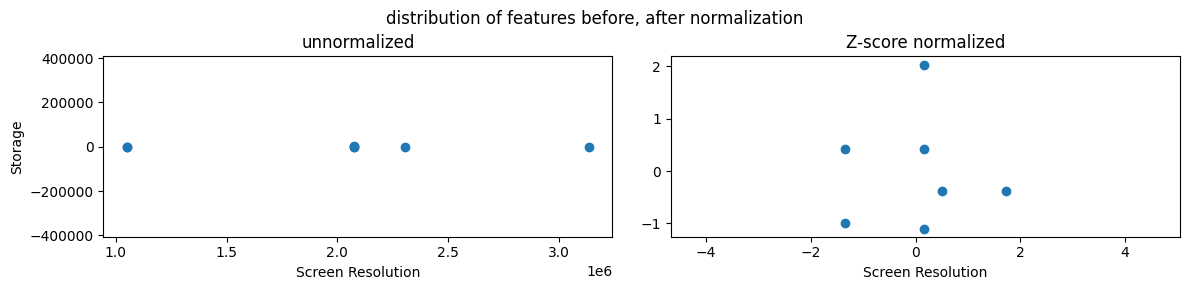

In [28]:
mu, sigma, X_norm = zscore_normaliztion(X_train) 

f1 = 0
f2 = 3

fig,ax=plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(X_train[:,f1], X_train[:,f2])
ax[0].set_xlabel(X_features[f1]); ax[0].set_ylabel(X_features[f2]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_norm[:,f1], X_norm[:,f2])
ax[1].set_xlabel(X_features[f1]); ax[0].set_ylabel(X_features[f2]);
ax[1].set_title(r"Z-score normalized")
ax[1].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, after normalization")
plt.show()

# Implementing

In [29]:
w_init = np.zeros(n)
b_init = 0
alpha = 1.0e-2
epsilon = 0.05
start_time = time.time()

w_final, b_final, J_history = gradient_descent_algorithm(w_init, b_init, X_norm, y_train, alpha, epsilon, compute_cost, compute_gradient)

end_time = time.time()
execution_time = end_time - start_time

print(f"b,w found by gradient descent: {b_final:0.2f}, {w_final} ")
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
print(f"Execution Time: {execution_time:.6f} seconds")

iteration 0, cost 563663.79
iteration 1000, cost  4567.85
iteration 2000, cost  3954.74
iteration 3000, cost  3633.86
iteration 4000, cost  3465.90
iteration 5000, cost  3377.98
iteration 6000, cost  3331.96
iteration 7000, cost  3307.87
iteration 8000, cost  3295.26
iteration 9000, cost  3288.66
iteration 10000, cost  3285.20
iteration 11000, cost  3283.39
iteration 12000, cost  3282.45
iteration 13000, cost  3281.95
iteration 14000, cost  3281.69
iteration 15000, cost  3281.56
iteration 16000, cost  3281.49
End of the loop with 16061 iterations and Cost of  3281.48
b,w found by gradient descent: 891.71, [ 271.59  321.07  409.11 -148.87] 
prediction: 618.39, target value: 458.98
prediction: 205.44, target value: 205.0
prediction: 833.51, target value: 899.99
prediction: 1466.79, target value: 1469.0
prediction: 1170.72, target value: 1109.99
prediction: 103.04, target value: 199.99
prediction: 1844.06, target value: 1899.0
Execution Time: 2.452989 seconds


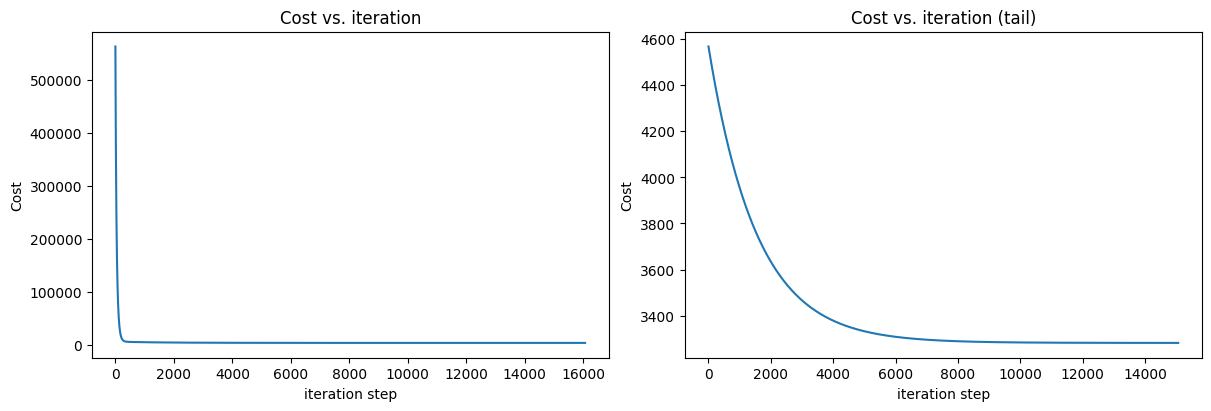

In [30]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(J_history[1000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

## Target vs Prediction

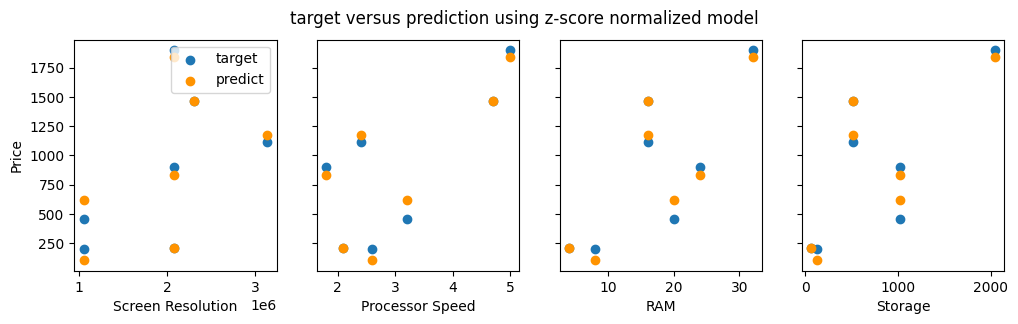

In [31]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_final) + b_final

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], yp, color="#FF9300", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()